## EDA , Feature Engineering & logistic Regression (Classification)

# Algerian Forest Fires Dataset Data Set

# Data Set Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire.

# Import required libraries

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import the data

In [2]:
df = pd.read_csv(r'E:\\himanshu_2022\\Download\\Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
# first 5 rows...
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
# last 5 rows...
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [5]:
# drop rows which have no information..
df.drop([122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [6]:
# creating region feature..
df.loc[:122,'region'] = '0'
df.loc[122:, 'region'] = '1'

In [7]:
#datatype & describe...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [8]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,8,2
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,0
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,122


# data cleaning

In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [10]:
#stripping the names of the column...
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [11]:
df=df.astype(str)

In [12]:
# somes values in colums also have space
for feature in ['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    df[feature]= df[feature].str.replace(" ","")

In [13]:
#index no 165 for feature name FWI has value fire
df[df['FWI']== 'fire'].index

Int64Index([165], dtype='int64')

In [57]:
### replacing fire value witha float value
df.loc[165,'FWI']=' 0.1'

In [15]:
#replacing nan value with fire to make data equal to the info given in dataset 
df[df['Classes']== 'nan'].index
df.loc[165,'Classes']='fire'

In [16]:
# we adding a new column Region to dataset
# rows 1 = Bejaia Region and 0 = Sidi Bel-abbes Region
df['Region'] = 1
for i in range(len(df)):
    if i >= 122:
        df['Region'][i] = 0

# changing the datatype

In [17]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['Ws']=df['Ws'].astype(float)
df['region']=df['region'].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  region       244 non-null    float64
 15  Region       244 non-null    int64  
dtypes: float64(7), int32(5), int64(1), object(3)
memory usage: 25.9+ KB


In [19]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
Region         0
dtype: int64

# Statistical data

In [20]:
# Statistical summary of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
ISI,244.0,4.774180,4.175318,0.0,1.400,3.50,7.300,19.0


# categorical feature

In [21]:
# Printing all the categorical columns
categorical_col = [fea for fea in df.columns if df[fea].dtype == 'O']
print('Categorical columns--',categorical_col)


Categorical columns-- ['DC', 'FWI', 'Classes']


# numerical columns

In [22]:
# Printing all the numerical columns
numerical_col = [fea for fea in df.columns if df[fea].dtype != 'O']
print('Numerical columns--',numerical_col)

Numerical columns-- ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'region', 'Region']


In [23]:
df[numerical_col].nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
ISI            106
BUI            174
region           2
Region           2
dtype: int64

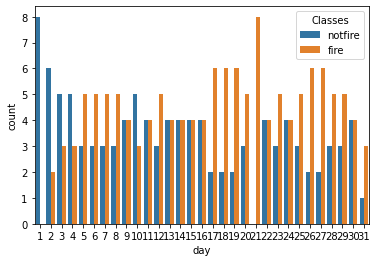

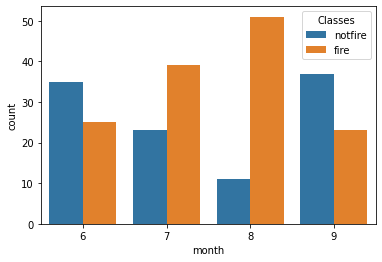

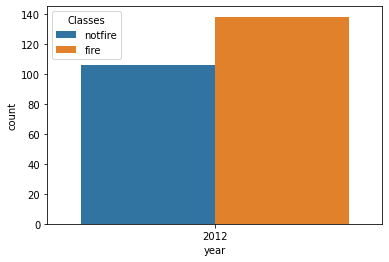

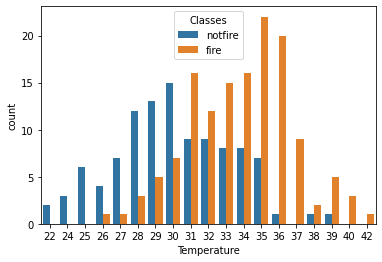

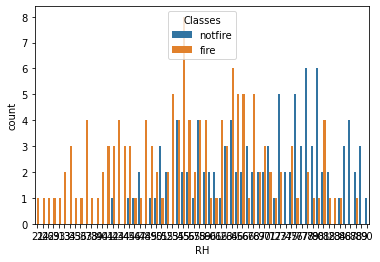

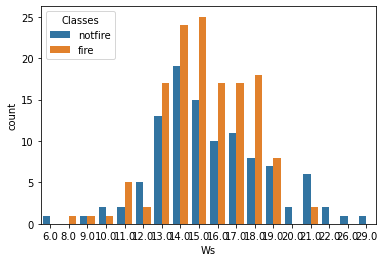

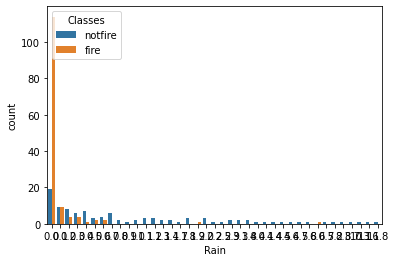

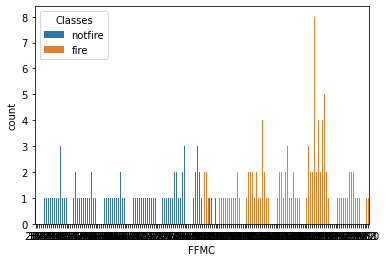

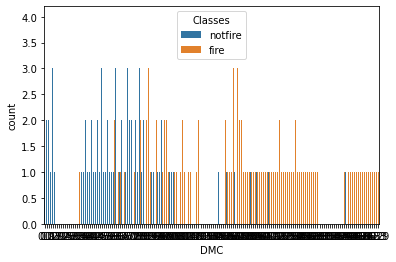

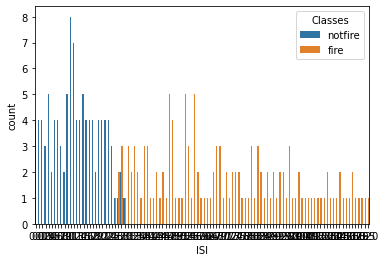

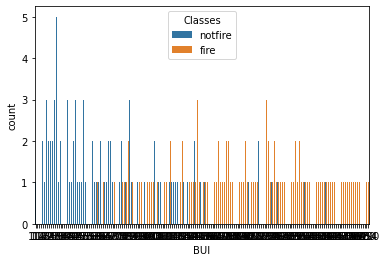

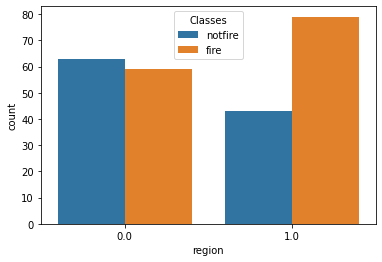

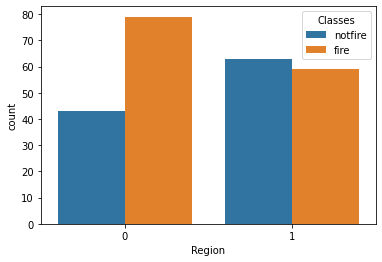

In [24]:
 #this is bivariate analysis between target features classes and discrete numerical columns
# plot
for features in numerical_col:
    sns.countplot(data = df, x=features , hue='Classes')
    plt.show()

# distribution of  numerical columns

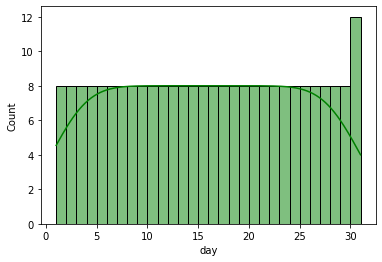

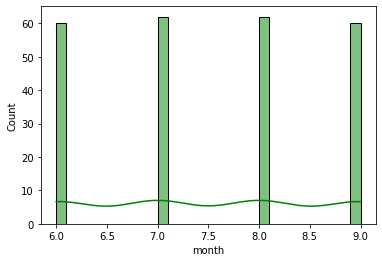

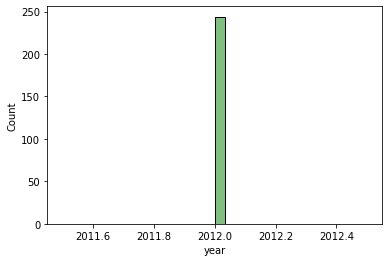

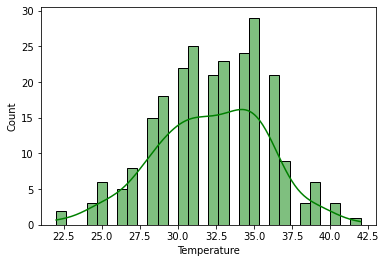

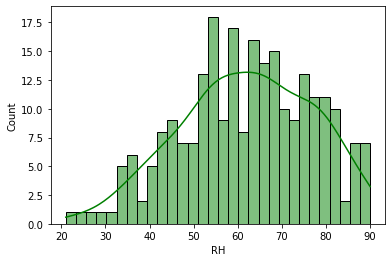

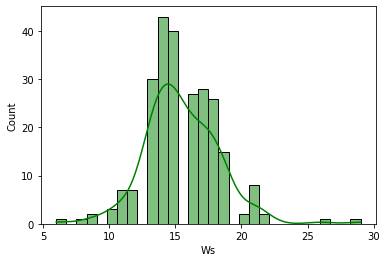

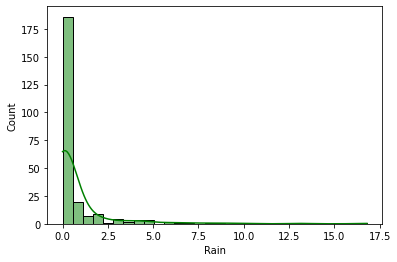

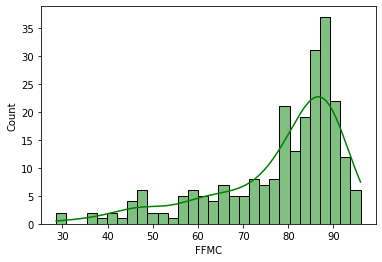

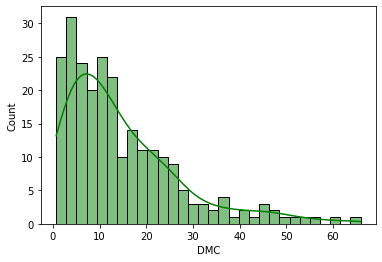

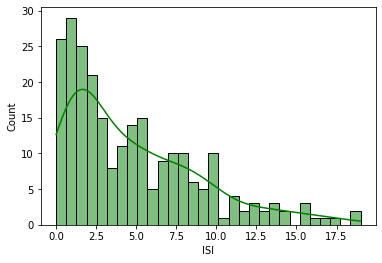

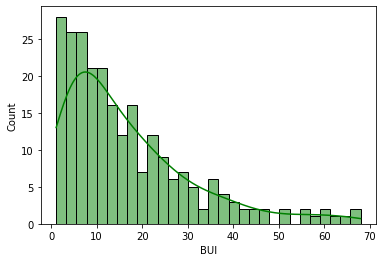

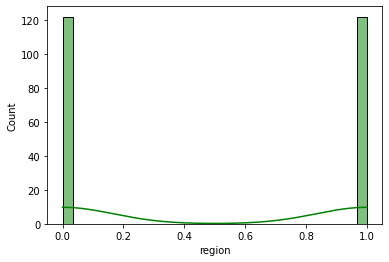

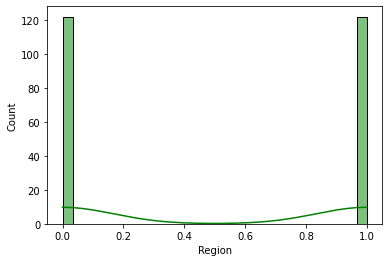

In [25]:
#checking distribution of numerical columns..
for feature in numerical_col:
    sns.histplot(data=df, x=feature,kde=True, bins=30, color='green')
    plt.show();

# Univariate Analysis of Numerical Features

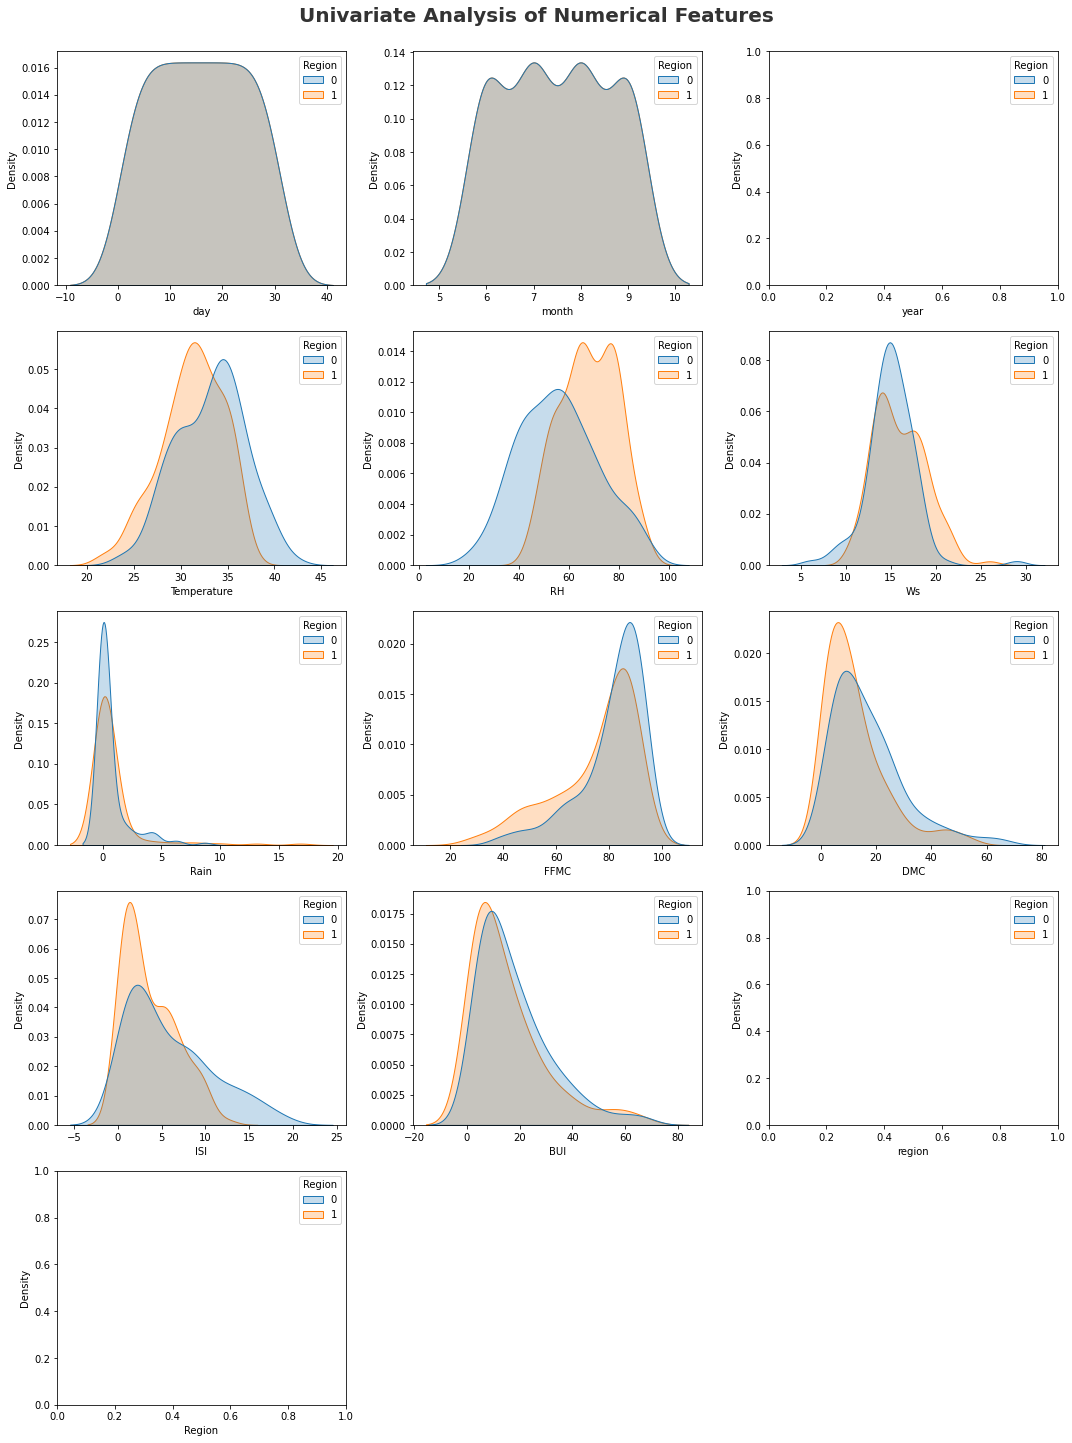

In [26]:
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_col[i]],shade=True, color='r',hue='Region',data=df)
    plt.xlabel(numerical_col[i])
    plt.tight_layout()

# Distribution Categorical columns of our Dataset

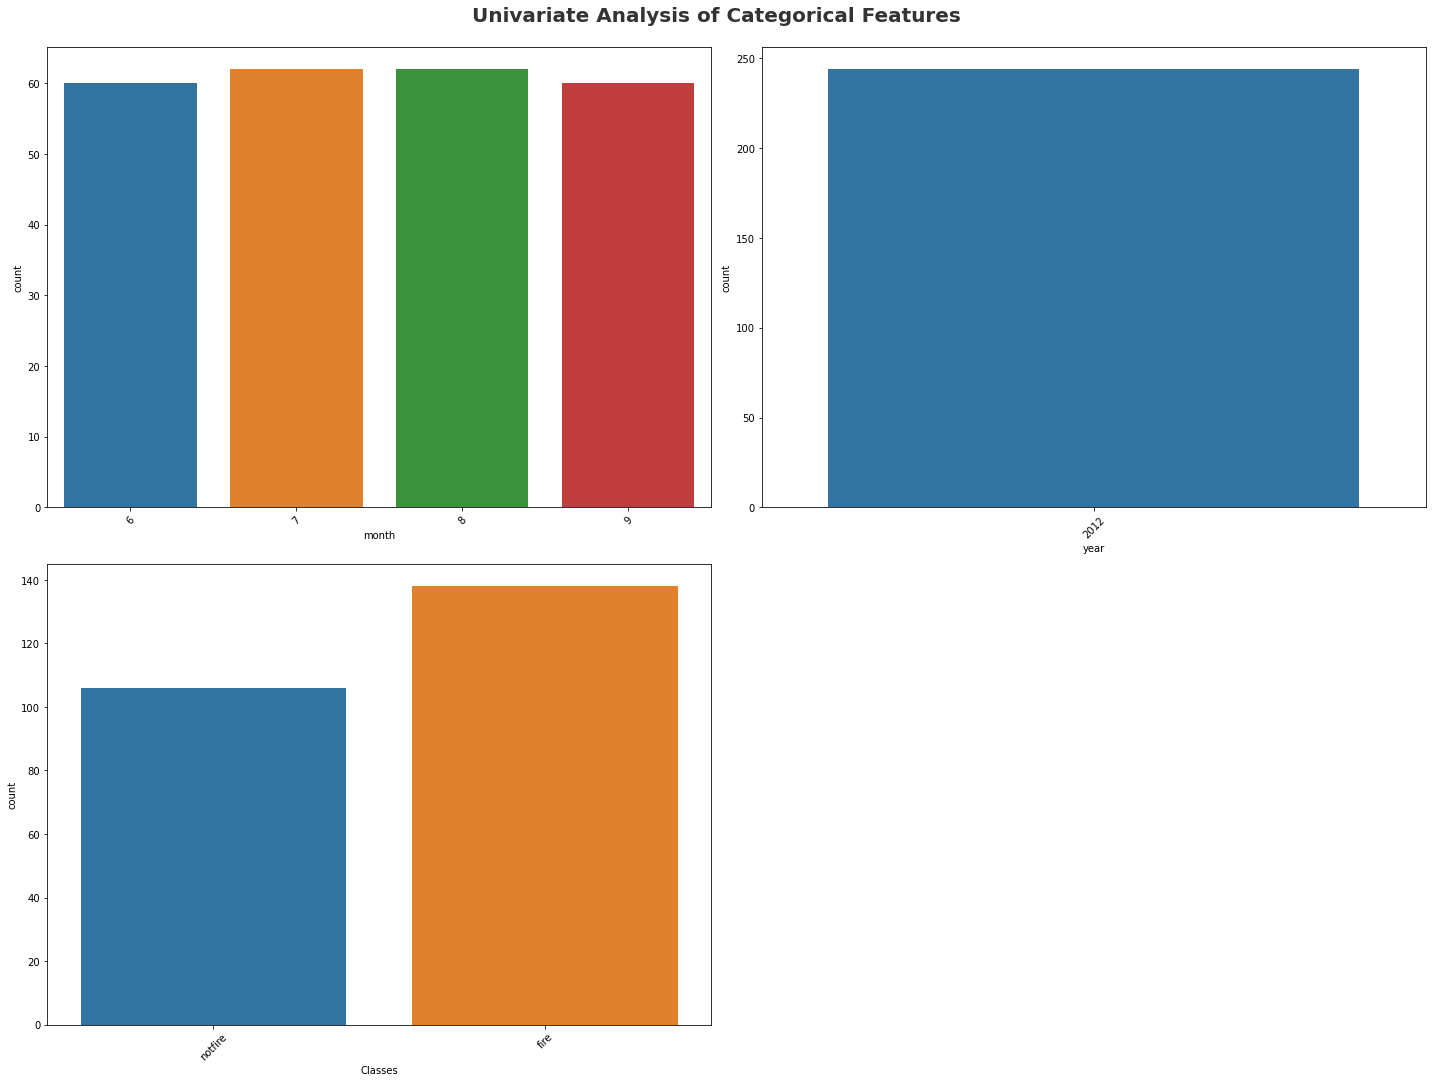

In [27]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['month', 'year', 'Classes']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Checking for Correlation

In [28]:
data = round(df[[feature for feature in numerical_col if feature not in ['day', 'month','year', 'Region']]].corr(),2)
data

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,region
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.48,0.61,0.46,0.27
RH,-0.65,1.00,0.24,0.22,-0.65,-0.41,-0.69,-0.35,-0.41
Ws,-0.28,0.24,1.00,0.17,-0.16,-0.00,0.02,0.03,-0.18
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.35,-0.30,-0.04
FFMC,0.68,-0.65,-0.16,-0.54,1.00,0.60,0.74,0.59,0.22
DMC,0.48,-0.41,-0.00,-0.29,0.60,1.00,0.67,0.98,0.19
ISI,0.61,-0.69,0.02,-0.35,0.74,0.67,1.00,0.64,0.27
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.64,1.00,0.09
region,0.27,-0.41,-0.18,-0.04,0.22,0.19,0.27,0.09,1.00


<AxesSubplot:>

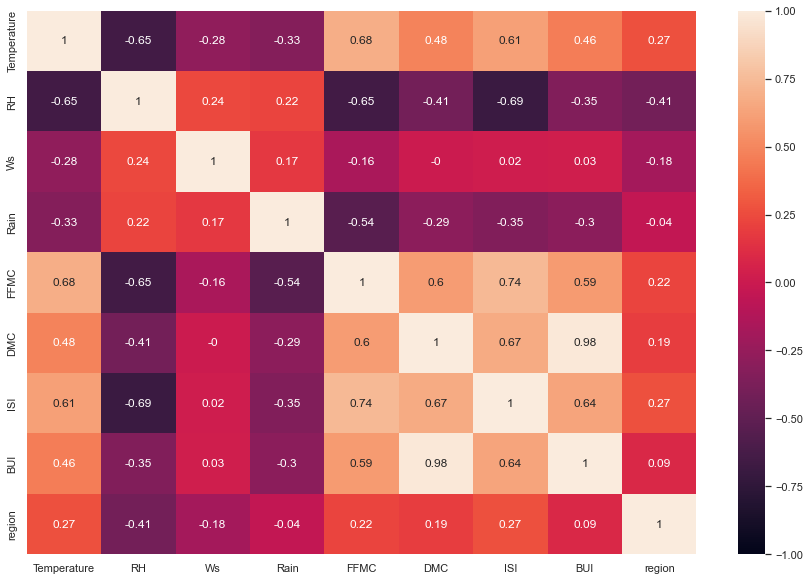

In [29]:
 #Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=data, annot=True,  vmin=-1, vmax=1)

#  Plotting Relationship Between Independent & Target Variables

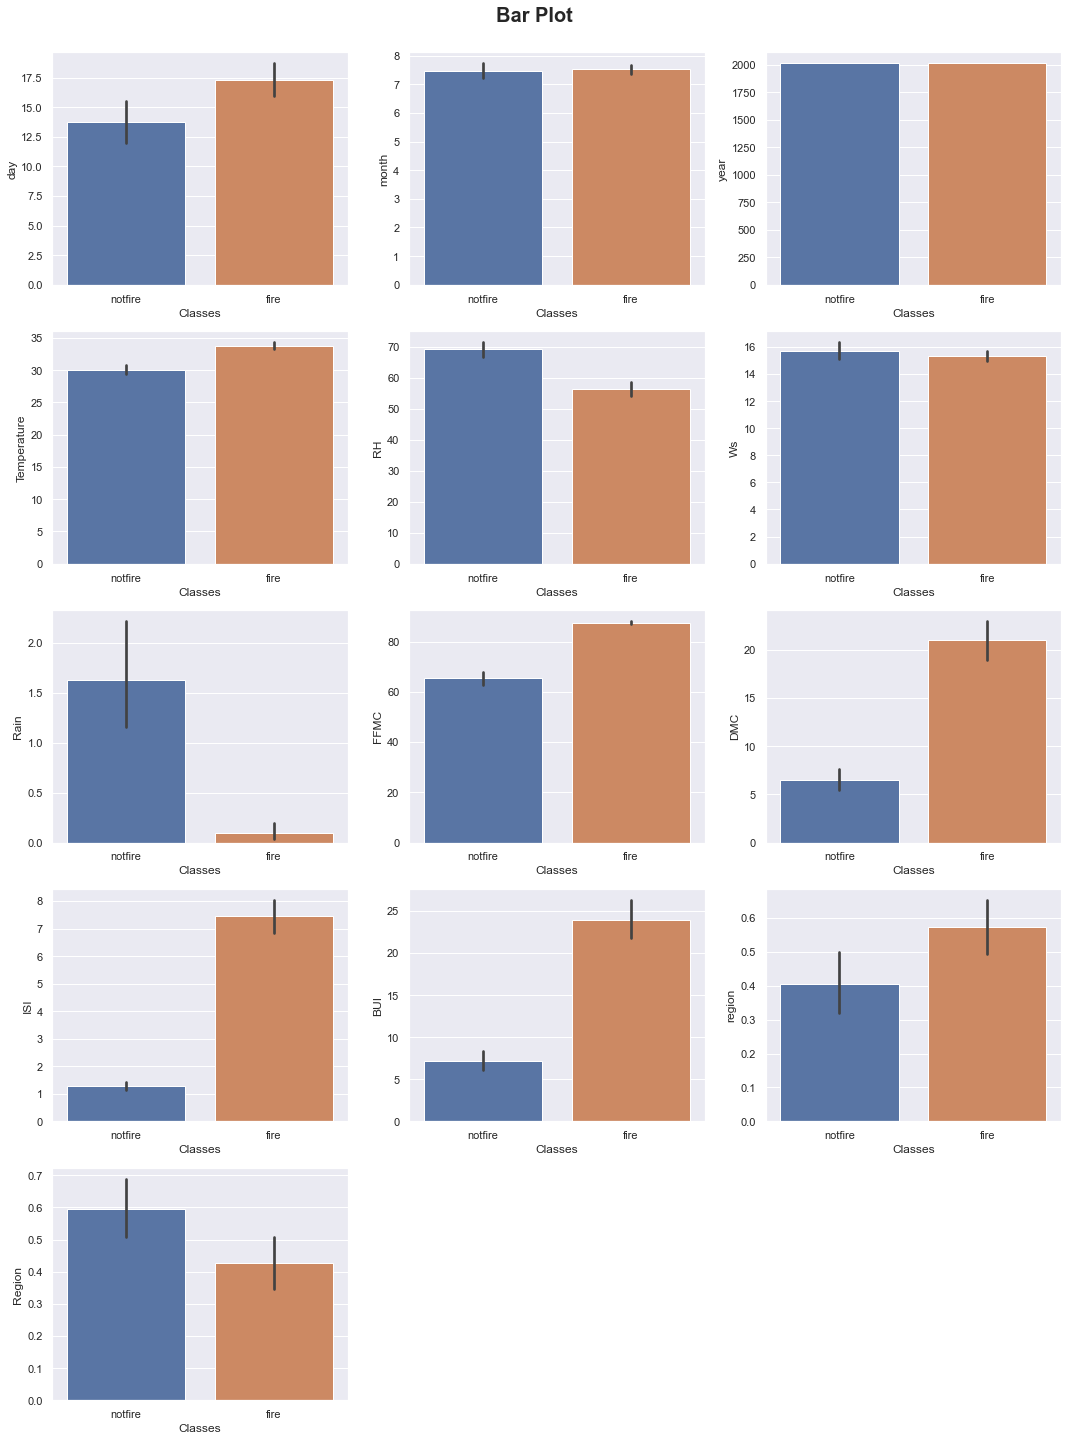

In [30]:
plt.figure(figsize=(15, 20))
plt.suptitle('Bar Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_col)):
    plt.subplot(5, 3, i+1)
    sns.barplot(y=numerical_col[i], x='Classes', data=df)
    plt.tight_layout()

# strip plot

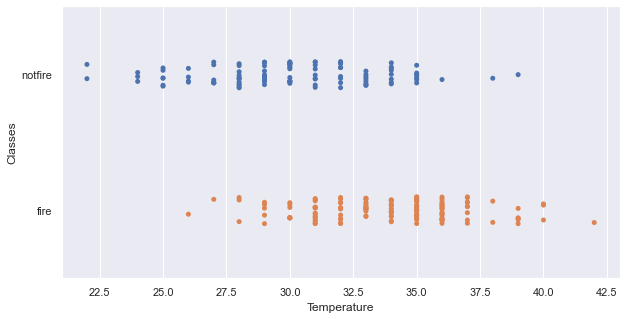

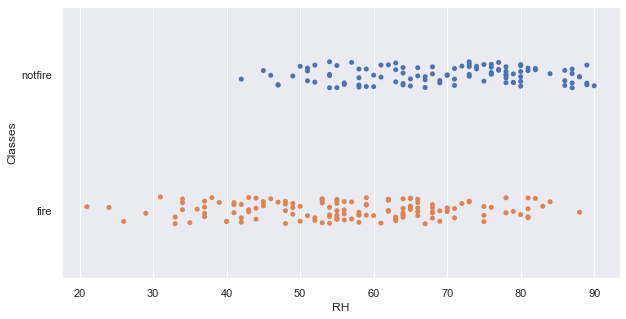

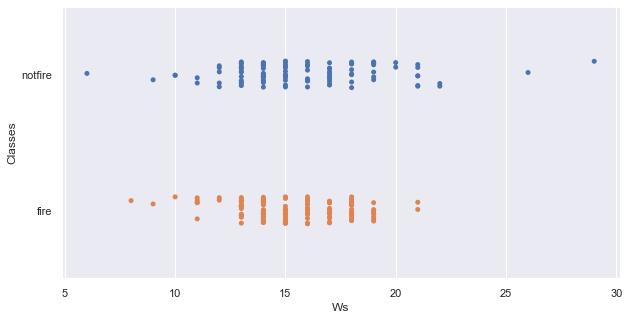

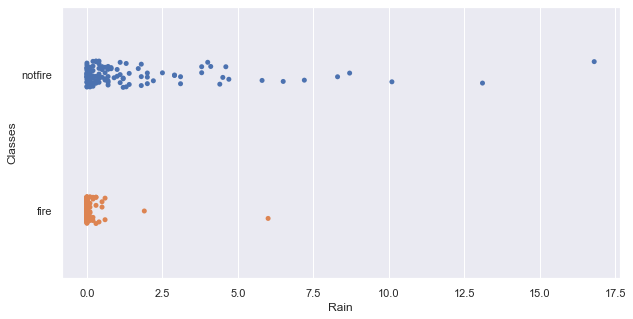

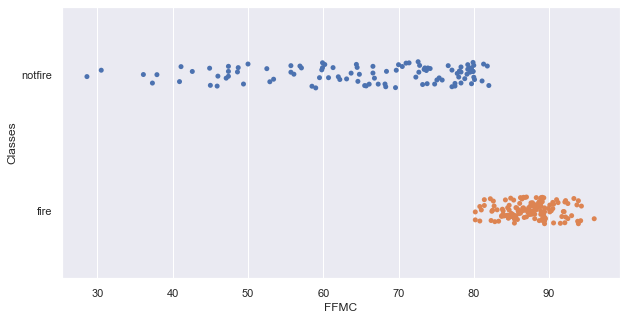

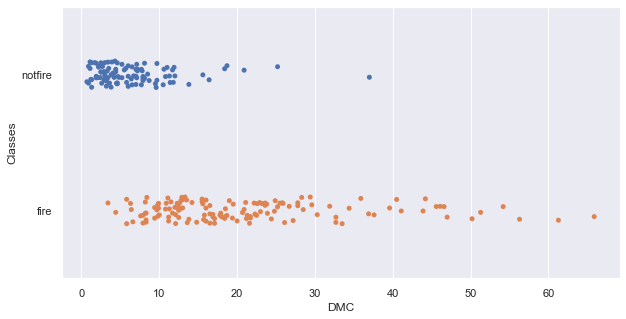

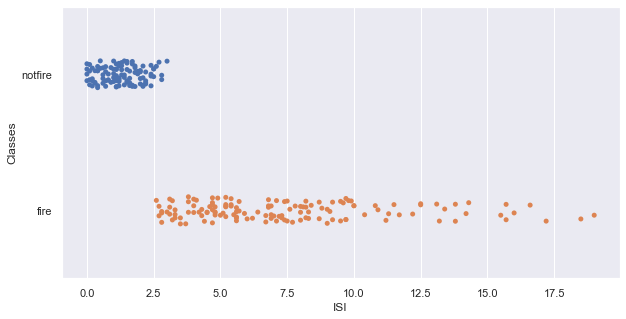

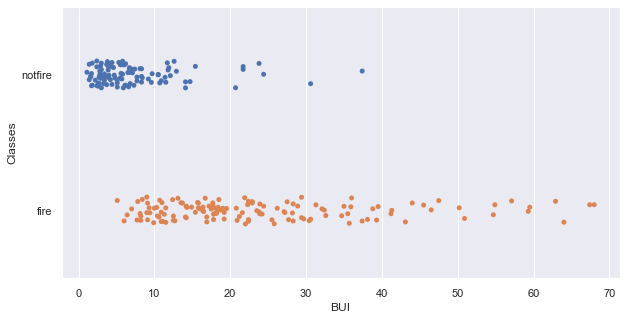

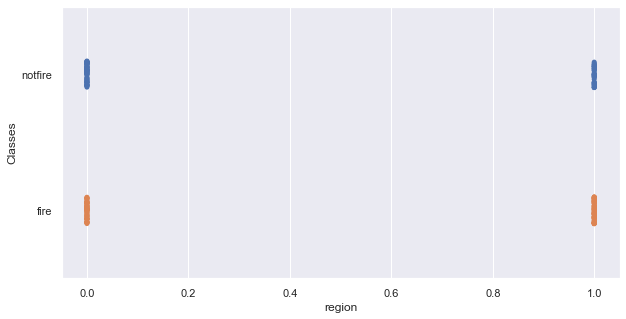

In [31]:
num_feature_custom=[feature for feature in numerical_col if feature not in ['day', 'month', 'year', 'Region']]

sns.set(rc={'figure.figsize':(10,5)})
for feature in num_feature_custom:
    sns.stripplot(data=df, x=feature, y='Classes')
    plt.show();

In [32]:
# creating classes feature..
df.loc[:122,'Classes'] = '0'
df.loc[122:, 'Classes'] = '1'

In [33]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,Region
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0,1
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0,1
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0,1
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0,0.0,1
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0,0
240,27,9,2012,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,1,1.0,0
241,28,9,2012,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1.0,0
242,29,9,2012,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1.0,0


In [34]:
df['Classes'].unique()

array(['0', '1'], dtype=object)

# Train Test Split

In [35]:
# lets create a model ...
X = df.iloc[:, 3:13]
y = df['Classes']
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5
240,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0
241,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [36]:
y 

0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    1
241    1
242    1
243    1
Name: Classes, Length: 244, dtype: object

In [37]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [38]:
print(X_train.shape, X_test.shape)


(170, 10) (74, 10)


In [39]:
print(y_train.shape, y_test.shape)

(170,) (74,)


# Logistic Regression

In [40]:
loger = LogisticRegression()

loger.fit(X_train,y_train)

LogisticRegression()

# print coef.. & intercept

In [41]:
print(loger.coef_)
print(loger.intercept_)

[[ 0.05063431 -0.03118578  0.04265036 -0.03227229 -0.03125581  1.08333442
   0.03505067  0.60029604 -0.90078606 -0.45493135]]
[0.09608843]


In [42]:
y_pred = loger.predict(X_test)

dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataset.head(30)

,Actual,Predicted
64,0,1
63,0,1
55,0,0
111,0,0
225,1,0
92,0,0
76,0,0
181,1,1
188,1,1
180,1,1


# MAE , MSE  and  RMSE

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [44]:
print("Mean squred error is ",round(mean_squared_error(y_test,y_pred),3))

Mean squred error is  0.257


In [45]:
print("Mean absolute error is ",round(mean_squared_error(y_test,y_pred),3))

Mean absolute error is  0.257


In [46]:
# Performance Matrics

In [47]:
# R2....
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

-0.027027027027026973


In [48]:
## Adjusted R2 ...
adjR=1-(1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjR)

-0.07110544020415266


# Confusion Matrix

In [49]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[32,  5],
       [14, 23]], dtype=int64)

In [62]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

# Accuracy 

In [63]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7432432432432432

# Precision score


In [68]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8648648648648649

In [65]:
#Recall score
Recall = true_positive/(true_positive + false_negative)
Recall

0.6956521739130435

# F1 score

In [70]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.7710843373493975